In [8]:
import numpy as np
import pandas as pd
data={
    "Name":["Ayesha","Ali","Sara","Usmann",None],
    "Age":[20,22,np.nan,23,24],
    "City":["Lahore","Karachi","Islamabad",None,"Lahore"],
    "Salary":[50000,None,67000,57790,34567]
}

df=pd.DataFrame(data)
print(df)


     Name   Age       City   Salary
0  Ayesha  20.0     Lahore  50000.0
1     Ali  22.0    Karachi      NaN
2    Sara   NaN  Islamabad  67000.0
3  Usmann  23.0       None  57790.0
4    None  24.0     Lahore  34567.0


In [4]:
print(df.isnull())

    Name    Age   City  Salary
0  False  False  False   False
1  False  False  False    True
2  False   True  False   False
3  False  False   True   False
4   True  False  False   False


In [5]:
#Count how many missing values each column has

print(df.isnull().sum())

Name      1
Age       1
City      1
Salary    1
dtype: int64


In [6]:
#check total missing values in entire data frame

print("Total missing:",df.isnull().sum().sum())

Total missing: 4


In [9]:
df_cleaned=df.dropna()
print(df_cleaned)

     Name   Age    City   Salary
0  Ayesha  20.0  Lahore  50000.0


In [10]:
df_filled=df.fillna("Unknown")
print(df_filled)

      Name      Age       City   Salary
0   Ayesha     20.0     Lahore  50000.0
1      Ali     22.0    Karachi  Unknown
2     Sara  Unknown  Islamabad  67000.0
3   Usmann     23.0    Unknown  57790.0
4  Unknown     24.0     Lahore  34567.0


In [15]:
df["Name"].fillna("Not Available",inplace=True)
df["Age"].fillna(25,inplace=True)
df["City"].fillna("Lahore",inplace=True)
df["Salary"].fillna(df["Salary"].median(),inplace=True)
print(df)

            Name   Age       City   Salary
0         Ayesha  20.0     Lahore  50000.0
1            Ali  22.0    Karachi  53895.0
2           Sara  25.0  Islamabad  67000.0
3         Usmann  23.0     Lahore  57790.0
4  Not Available  24.0     Lahore  34567.0


C:\Users\User\AppData\Local\Temp\ipykernel_17880\3169435958.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(25,inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17880\3169435958.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

<h3>HAndling Duplicate DAta</h3>

In [16]:
print(df.duplicated())

0    False
1    False
2    False
3    False
4    False
dtype: bool


In [18]:
print("Total Duplicates:",df.duplicated().sum,())

Total Duplicates: <bound method Series.sum of 0    False
1    False
2    False
3    False
4    False
dtype: bool> ()


In [19]:
df.drop_duplicates(inplace=True)
print("After removing duplicates:")
print(df)

After removing duplicates:
            Name   Age       City   Salary
0         Ayesha  20.0     Lahore  50000.0
1            Ali  22.0    Karachi  53895.0
2           Sara  25.0  Islamabad  67000.0
3         Usmann  23.0     Lahore  57790.0
4  Not Available  24.0     Lahore  34567.0


In [20]:
#converting data types

print(df.dtypes)

Name       object
Age       float64
City       object
Salary    float64
dtype: object


In [22]:
df["Salary"]=df["Salary"].astype(int)
print(df.dtypes)

Name       object
Age       float64
City       object
Salary      int64
dtype: object


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    5 non-null      object 
 1   Age     5 non-null      float64
 2   City    5 non-null      object 
 3   Salary  5 non-null      int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 292.0+ bytes


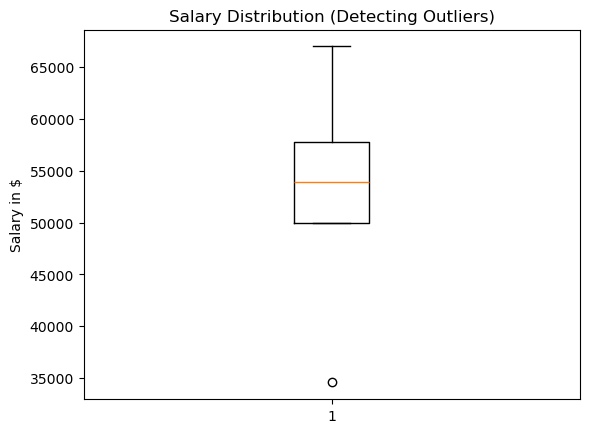

In [25]:
import matplotlib.pyplot as plt

plt.boxplot(df["Salary"])
plt.title("Salary Distribution (Detecting Outliers)")
plt.ylabel("Salary in $")
plt.show()


In [26]:
from sklearn.preprocessing import LabelEncoder

df_encoded=df.copy()
le=LabelEncoder()
df_encoded["City"]=le.fit_transform(df_encoded["City"])
print(df_encoded)

            Name   Age  City  Salary
0         Ayesha  20.0     2   50000
1            Ali  22.0     1   53895
2           Sara  25.0     0   67000
3         Usmann  23.0     2   57790
4  Not Available  24.0     2   34567
